# Exercises of the fifth week

## Pandas DataFrame

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

N = input("Choose number of N (max 1310720): ")

try:
    N = int(N)
except:
    print("Input is not an integer N.")
    exit()

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))

Choose number of N (max 1310720): 1310720
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [3]:
# Commenting code lines that would be necessary to make the pieces of code work singularly
"""
import numpy as np
import pandas as pd

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

N = 1310720

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))
"""

bx = data["BX_COUNTER"]
print("Minimum and maximum values of BX_COUNTER: (" + str(bx.min()) + ", " + str(bx.max()) + ")")
print("There are 3564 BX in an ORBIT (0-3563). \nThis also can be seen by checking the number of \"bx.max()+1\" elements (considering whole dataset): \nwhile we have about 350 counts for BX <= 3563 (which is approximately the expectation value for a uniform distribution, = 367), suddently the count drops to 0 if we set BX >= 3564.\n")

cx = bx[bx == bx.max()].copy()
print("Count of " + str(bx.max()) + ": " + str(len(cx)))
print("Count of " + str(bx.max()-1) + ": " + str(len(bx[bx == bx.max()-1])))
print("Count of " + str(bx.max()-2) + ": " + str(len(bx[bx == bx.max()-2])) + "\n")

dx = bx[bx == bx.max()+1].copy()
print("Count of " + str(bx.max()+1) + ": " + str(len(dx)))
print("Count of " + str(bx.max()+2) + ": " + str(len(bx[bx == bx.max()+2])))
print("Count of " + str(bx.max()+3) + ": " + str(len(bx[bx == bx.max()+3])) + "\n")

Minimum and maximum values of BX_COUNTER: (0, 3563)
There are 3564 BX in an ORBIT (0-3563). 
This also can be seen by checking the number of "bx.max()+1" elements (considering whole dataset): 
while we have about 350 counts for BX <= 3563 (which is approximately the expectation value for a uniform distribution, = 367), suddently the count drops to 0 if we set BX >= 3564.

Count of 3563: 351
Count of 3562: 328
Count of 3561: 385

Count of 3564: 0
Count of 3565: 0
Count of 3566: 0



3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [4]:
"""
import numpy as np
import pandas as pd
import datetime as dt

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

N = 1310720

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))
"""

print("Values of \"TD_MEAS\" range between (" + str(data["TDC_MEAS"].min()) + "," + str(data["TDC_MEAS"].max()) + "), so they correspond to 30ns.\n")

data["NS"] = (data["TDC_MEAS"] + (30 * data["BX_COUNTER"]) + (30 * 3564 * data["ORBIT_CNT"]))  - (data.at[data.index[0], "TDC_MEAS"] + (30 * data.at[data.index[0], "BX_COUNTER"]) + (30 * 3564 * data.at[data.index[0], "ORBIT_CNT"]))
data["TIME"] = pd.to_datetime(data["NS"])
# Literally converted the column, not clear if you wanted me to convert to the exact time the experiment took place (with offset) or the difference (NS column)

print(data)

Values of "TD_MEAS" range between (0,29), so they correspond to 30ns.

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                 NS                          TIME  
0                 0 1970-01-01 00:00

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [5]:
"""
import numpy as np
import pandas as pd
import datetime as dt

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

N = 1310720

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))
"""

dataall["NS"] = (dataall["TDC_MEAS"] + (30 * dataall["BX_COUNTER"]) + (30 * 3564 * dataall["ORBIT_CNT"]))  - (dataall.at[dataall.index[0], "TDC_MEAS"] + (30 * dataall.at[dataall.index[0], "BX_COUNTER"]) + (30 * 3564 * dataall.at[dataall.index[0], "ORBIT_CNT"]))
dataall["TIME"] = pd.to_datetime(dataall["NS"])

timedata = dataall.at[dataall.index[-1], "TIME"] - dataall.at[dataall.index[0], "TIME"]

print("The duration of the data taking lasted for " + str(dataall.at[dataall.index[-1], "TIME"].hour) + " hours, " + str(dataall.at[dataall.index[-1], "TIME"].minute) + " minutes, " + str(dataall.at[dataall.index[-1], "TIME"].second) + " seconds.")
print("More precisely, " + str(timedata))

The duration of the data taking lasted for 0 hours, 0 minutes, 1 seconds.
More precisely, 0 days 00:00:01.176499312


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [6]:
"""
import numpy as np
import pandas as pd

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

N = 1310720

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))
"""

ch = data.groupby("TDC_CHANNEL")["HEAD"].sum().sort_values(ascending = False)

print("The 3 TDC channel having the most entries are the following:\n")
print(ch.head(3))

The 3 TDC channel having the most entries are the following:

TDC_CHANNEL
139    108059
64      66020
63      64642
Name: HEAD, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [7]:
"""
import numpy as np
import pandas as pd

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

N = 1310720

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))
"""

print("The number of orbits having at least one hit is " + str(len(data["ORBIT_CNT"].unique())) + ".")

The number of orbits having at least one hit is 11001.


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [8]:
"""
import numpy as np
import pandas as pd

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

N = 1310720

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))
"""

print("The number of orbits having at least one hit from TDC_CHANNEL = 139 is " + str(len(data[data["TDC_CHANNEL"] == 139]["ORBIT_CNT"].unique())) + ".")

The number of orbits having at least one hit from TDC_CHANNEL = 139 is 10976.


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [9]:
"""
import numpy as np
import pandas as pd

infile = "./../data/data_000637.txt"
dataall = pd.read_csv(infile)

N = 1310720

if(N > 10000 and N <= dataall.shape[0]):
    data = dataall[0:N].copy()
    print(data)
else:
    print("Invalid N value, must be larger than 1000 and smaller or equal to " + str(dataall.shape[0]))
"""

s1 = data[data["FPGA"] == 0].groupby("TDC_CHANNEL")["HEAD"].sum()
s2 = data[data["FPGA"] == 1].groupby("TDC_CHANNEL")["HEAD"].sum()

print("Series for FPGA = 0:\n" + str(s1) + "\n\nSeries for FPGA = 1:\n" + str(s2) + "\n")
print("Type of the two objects to verify they are series:\n " + str(type(s1)) + ", " + str(type(s2)) + "\n")

print("If I don't need unnecessary information and I want a simple series:\n")

sd1 = pd.Series(s1.to_dict())
sd2 = pd.Series(s2.to_dict())

print("Series for FPGA = 0:\n" + str(sd1) + "\n\nSeries for FPGA = 1:\n" + str(sd2) + "\n")
print("Type of the two objects to verify they are series:\n " + str(type(sd1)) + ", " + str(type(sd2)) + "\n")

Series for FPGA = 0:
TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Name: HEAD, Length: 124, dtype: int64

Series for FPGA = 1:
TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Name: HEAD, Length: 132, dtype: int64

Type of the two objects to verify they are series:
 <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>

If I don't need unnecessary information and I want a simple series:

Series for FPGA = 0:
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Length: 124, dtype: int64

Series for FPGA = 1:
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Length: 132, dtype: 

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

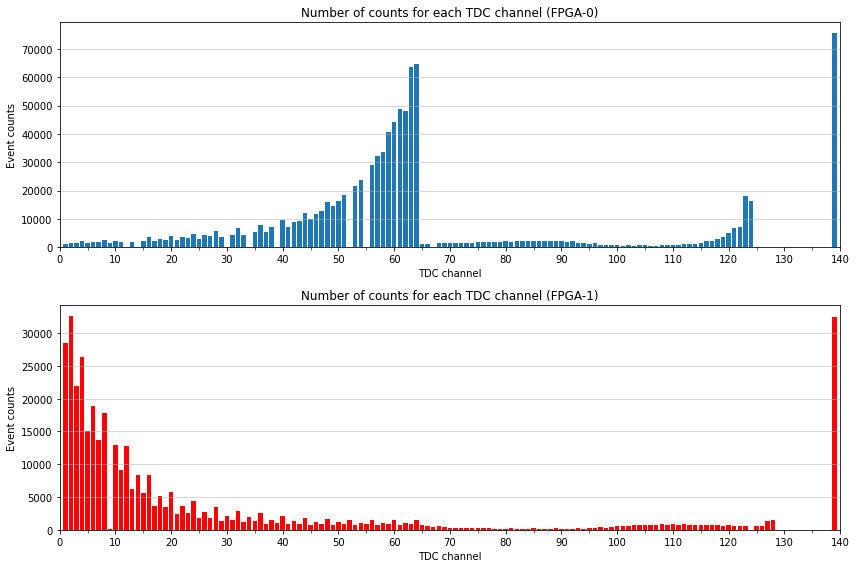

In [10]:
# It does say "for each TDC channel" so I kept the number of bins equal to the TDC channel numbers

from matplotlib.ticker import AutoMinorLocator

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax1.bar(list(s1.to_dict().keys()), list(s1.to_dict().values()))

ax1.set_title("Number of counts for each TDC channel (FPGA-0)")
ax1.set_xlabel("TDC channel")
ax1.set_ylabel("Event counts")
ax1.set_xlim(0,140)
ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(linewidth=0.5, axis="y")
ax1.tick_params(which="minor", length=2.5)

ax2.bar(list(s2.to_dict().keys()), list(s2.to_dict().values()), color="r")

ax2.set_title("Number of counts for each TDC channel (FPGA-1)")
ax2.set_xlabel("TDC channel")
ax2.set_ylabel("Event counts")
ax2.set_xlim(0,140)
ax2.xaxis.set_major_locator(plt.MultipleLocator(10))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.grid(linewidth=0.5, axis="y")
ax2.tick_params(which="minor", length=2.5)

fig.tight_layout()
plt.show()